# Testing the Spectral Initialization

I noticed that previously, ratings were initialized with a random uniform distribution, which I understand is borrowed from deep learning practice, but I thought in this case we might be able to do a little better. Since the Ekhart-Young theorem gives a closed-form solution to low-rank matrix factorization without intercepts, my idea was to use the SVD to initialize the factors as if the intercepts were all zero, and then to perform gradient optimization. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scoring.matrix_factorization.matrix_factorization import MatrixFactorization
from scoring.process_data import preprocess_data

In [2]:
ratings_df = pd.read_csv("ratings-00009.tsv", sep='\t')
preprocessed_ratings_df = preprocess_data(ratings=ratings_df, notes=None, noteStatusHistory=None, ratingsOnly=True)[1]

In [3]:
preprocessed_ratings_df_sample = pd.read_csv("ratings-00009-preprocessed.tsv", sep='\t')    # in case I saved a preprocessed copy

In [3]:
all_spec_fitNoteParams, all_spec_fitRaterParams, all_spec_globalIntercept, all_spec_train_loss, all_spec_loss, all_spec_validate_loss = [], [], [], [], [], []
all_unif_fitNoteParams, all_unif_fitRaterParams, all_unif_globalIntercept, all_unif_train_loss, all_unif_loss, all_unif_validate_loss = [], [], [], [], [], []
for _ in range(50):
    preprocessed_ratings_df_sample = preprocessed_ratings_df.sample(n=10000, replace=False)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams.append(fitNoteParams); all_spec_fitRaterParams.append(fitRaterParams); all_spec_globalIntercept.append(globalIntercept); all_spec_train_loss.append(train_loss); all_spec_loss.append(loss); all_spec_validate_loss.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams.append(fitNoteParams); all_unif_fitRaterParams.append(fitRaterParams); all_unif_globalIntercept.append(globalIntercept); all_unif_train_loss.append(train_loss); all_unif_loss.append(loss); all_unif_validate_loss.append(validate_loss)

c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:585: RuntimeWarning: Mean of empty slice
  mean_matrix = 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=1), nan=np.nanmean(data_matrix))[:,np.newaxis] \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:586: RuntimeWarning: Mean of empty slice
  + 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=0), nan=np.nanmean(data_matrix)) \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:585: RuntimeWarning: Mean of empty slice
  mean_matrix = 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=1), nan=np.nanmean(data_matrix))[:,np.newaxis] \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:586: RuntimeWarning: Mean of empty slice
  + 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=0), nan=np.nanmean(data_matrix)) \
c:\Users\iijof\Desktop\community

In [4]:
all_spec_fitNoteParams_30k, all_spec_fitRaterParams_30k, all_spec_globalIntercept_30k, all_spec_train_loss_30k, all_spec_loss_30k, all_spec_validate_loss_30k = [], [], [], [], [], []
all_unif_fitNoteParams_30k, all_unif_fitRaterParams_30k, all_unif_globalIntercept_30k, all_unif_train_loss_30k, all_unif_loss_30k, all_unif_validate_loss_30k = [], [], [], [], [], []
for _ in range(10):
    preprocessed_ratings_df_sample = preprocessed_ratings_df.sample(n=30000, replace=False)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams_30k.append(fitNoteParams); all_spec_fitRaterParams_30k.append(fitRaterParams); all_spec_globalIntercept_30k.append(globalIntercept); all_spec_train_loss_30k.append(train_loss); all_spec_loss_30k.append(loss); all_spec_validate_loss_30k.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams_30k.append(fitNoteParams); all_unif_fitRaterParams_30k.append(fitRaterParams); all_unif_globalIntercept_30k.append(globalIntercept); all_unif_train_loss_30k.append(train_loss); all_unif_loss_30k.append(loss); all_unif_validate_loss_30k.append(validate_loss)

c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:585: RuntimeWarning: Mean of empty slice
  mean_matrix = 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=1), nan=np.nanmean(data_matrix))[:,np.newaxis] \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:586: RuntimeWarning: Mean of empty slice
  + 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=0), nan=np.nanmean(data_matrix)) \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:585: RuntimeWarning: Mean of empty slice
  mean_matrix = 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=1), nan=np.nanmean(data_matrix))[:,np.newaxis] \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:586: RuntimeWarning: Mean of empty slice
  + 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=0), nan=np.nanmean(data_matrix)) \
c:\Users\iijof\Desktop\community

In [5]:
all_spec_fitNoteParams_dense, all_spec_fitRaterParams_dense, all_spec_globalIntercept_dense, all_spec_train_loss_dense, all_spec_loss_dense, all_spec_validate_loss_dense = [], [], [], [], [], []
all_unif_fitNoteParams_dense, all_unif_fitRaterParams_dense, all_unif_globalIntercept_dense, all_unif_train_loss_dense, all_unif_loss_dense, all_unif_validate_loss_dense = [], [], [], [], [], []
for _ in range(50):
    all_noteIds = preprocessed_ratings_df["noteId"].unique()
    all_raterIds = preprocessed_ratings_df["raterParticipantId"].unique()
    notes_sample = np.random.choice(all_noteIds, size=10000, replace=False)
    raters_sample = np.random.choice(all_raterIds, size=10000, replace=False)
    preprocessed_ratings_df_sample_dense = preprocessed_ratings_df[preprocessed_ratings_df["noteId"].isin(notes_sample) & preprocessed_ratings_df["raterParticipantId"].isin(raters_sample)]

    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample_dense, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams_dense.append(fitNoteParams); all_spec_fitRaterParams_dense.append(fitRaterParams); all_spec_globalIntercept_dense.append(globalIntercept); all_spec_train_loss_dense.append(train_loss); all_spec_loss_dense.append(loss); all_spec_validate_loss_dense.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample_dense, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams_dense.append(fitNoteParams); all_unif_fitRaterParams_dense.append(fitRaterParams); all_unif_globalIntercept_dense.append(globalIntercept); all_unif_train_loss_dense.append(train_loss); all_unif_loss_dense.append(loss); all_unif_validate_loss_dense.append(validate_loss)

c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:585: RuntimeWarning: Mean of empty slice
  mean_matrix = 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=1), nan=np.nanmean(data_matrix))[:,np.newaxis] \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:586: RuntimeWarning: Mean of empty slice
  + 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=0), nan=np.nanmean(data_matrix)) \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:585: RuntimeWarning: Mean of empty slice
  mean_matrix = 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=1), nan=np.nanmean(data_matrix))[:,np.newaxis] \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:586: RuntimeWarning: Mean of empty slice
  + 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=0), nan=np.nanmean(data_matrix)) \
c:\Users\iijof\Desktop\community

In [6]:
all_spec_fitNoteParams_30k_dense, all_spec_fitRaterParams_30k_dense, all_spec_globalIntercept_30k_dense, all_spec_train_loss_30k_dense, all_spec_loss_30k_dense, all_spec_validate_loss_30k_dense = [], [], [], [], [], []
all_unif_fitNoteParams_30k_dense, all_unif_fitRaterParams_30k_dense, all_unif_globalIntercept_30k_dense, all_unif_train_loss_30k_dense, all_unif_loss_30k_dense, all_unif_validate_loss_30k_dense = [], [], [], [], [], []
for _ in range(10):
    all_noteIds = preprocessed_ratings_df["noteId"].unique()
    all_raterIds = preprocessed_ratings_df["raterParticipantId"].unique()
    notes_sample = np.random.choice(all_noteIds, size=30000, replace=False)
    raters_sample = np.random.choice(all_raterIds, size=30000, replace=False)
    preprocessed_ratings_df_sample_dense = preprocessed_ratings_df[preprocessed_ratings_df["noteId"].isin(notes_sample) & preprocessed_ratings_df["raterParticipantId"].isin(raters_sample)]

    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample_dense, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams_30k_dense.append(fitNoteParams); all_spec_fitRaterParams_30k_dense.append(fitRaterParams); all_spec_globalIntercept_30k_dense.append(globalIntercept); all_spec_train_loss_30k_dense.append(train_loss); all_spec_loss_30k_dense.append(loss); all_spec_validate_loss_30k_dense.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample_dense, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams_30k_dense.append(fitNoteParams); all_unif_fitRaterParams_30k_dense.append(fitRaterParams); all_unif_globalIntercept_30k_dense.append(globalIntercept); all_unif_train_loss_30k_dense.append(train_loss); all_unif_loss_30k_dense.append(loss); all_unif_validate_loss_30k_dense.append(validate_loss)

c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:585: RuntimeWarning: Mean of empty slice
  mean_matrix = 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=1), nan=np.nanmean(data_matrix))[:,np.newaxis] \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:586: RuntimeWarning: Mean of empty slice
  + 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=0), nan=np.nanmean(data_matrix)) \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:585: RuntimeWarning: Mean of empty slice
  mean_matrix = 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=1), nan=np.nanmean(data_matrix))[:,np.newaxis] \
c:\Users\iijof\Desktop\communitynotes\sourcecode\scoring\matrix_factorization\matrix_factorization.py:586: RuntimeWarning: Mean of empty slice
  + 1/2*np.nan_to_num(np.nanmean(data_matrix, axis=0), nan=np.nanmean(data_matrix)) \
c:\Users\iijof\Desktop\community

## Results

I found the results surprsing! I expected the spectral initialization to guide the optimizer to a good part of the training loss landscape, so I thought the training and test loss would both improve a little. Instead, I found that the uniform initialization gave better training loss, but the spectal initialization gave far better validation loss. My best guess is that this may have something to do with the well-posedness of taking the SVD. Perhaps since the SVD is (speaking loosely) known to vary smoothly with the matrix entries, it guides to an optimum that's robust to changes in those entries, and thus better generalizing. I don't have any less hand-wavey way of explaining it, but if the reader does please let me know!

I **have not** tested the spectral initialization when using `NormalizedLoss`, or against a uniform initialization using `NormalizedLoss`.

The uniform initialization also does much better in the metric just titled loss, which looks just the loss of Adam's last batch. I expect the other loss metrics to be more informative so I'm not too worried about it, but I figured I'd include it since the original code chose to return it so you might find it relevant for something. 

Since I'm running this all on my laptop cpu, I was limited to testing on small samples of the full community notes data. I ran 50 tests using a sample of 10k, and 10 tests using a sample of 30k. Sampling from a sparse matrix is tricky, and I'm not sure how to best represent the full data. For the "sparse" samples selected below, I randomly sampled ratings (each a (rater, note) pair) which I found intuative at first. But, especially for the 10k sample I became concerned with the number of rows and columns that only had one entry. So, for the "dense" samples below, I sampled either 10k or 30k notes and 10k or 30k raters, and then selected all ratings from the dataset (which is itself 1/10 of all released data) where both the rater and note was in the sample. This led to a much denser (but still very sparse) ratings matrix. 

As a sanity check, I also took a look at the values of parameters returned by both initializations. They definitely are a little bit different, but neither looks more right or wrong than the other. This is also something interesting to continue to ponder. 

Unfortunately, SVD is expenseive to compute, and also requires the formation of the full raters-by-notes matrix, which I noticed the sourcecode takes care to avoid. If you intentionally have avoided ever using SVD solely because of its polyomial time and space use, then consider this a fun test! But, while running the entire SVD every hour may be intractable, I think SVD's fast rank-one updating procedures could make its use practically feasible for community notes' purposes. Additionally, I'm not sure, but it's possible there exist algorithms to get the top of the SVD without ever actually forming the raters-by-notes matrix.

C:\Users\iijof\AppData\Local\Temp\ipykernel_19676\1632991799.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


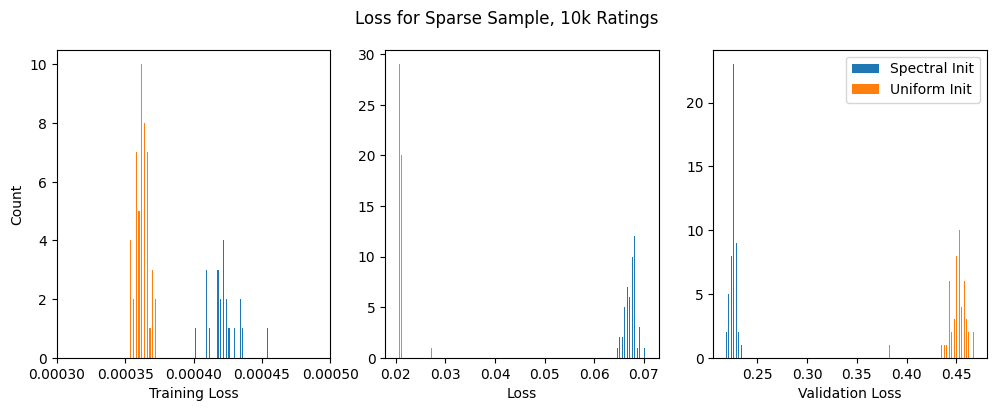

In [13]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

x_min, x_max = 0.0003, 0.0005    # cut out one outlier to the right with the of all_train_loss_unif
bins = np.linspace(x_min, x_max, 100)
ax[0].set_xlim(x_min, x_max)
ax[0].hist([all_spec_train_loss, all_unif_train_loss], bins=bins)
ax[0].set_xlabel("Training Loss")
ax[0].set_ylabel("Count")

ax[1].hist([all_spec_loss, all_unif_loss], bins=100)
ax[1].set_xlabel("Loss")

ax[2].hist([all_spec_validate_loss, all_unif_validate_loss], bins=100, label=["Spectral Init", "Uniform Init"])
ax[2].set_xlabel("Validation Loss")
ax[2].legend()

fig.suptitle("Loss for Sparse Sample, 10k Ratings")
fig.show()

C:\Users\iijof\AppData\Local\Temp\ipykernel_19676\3562222091.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


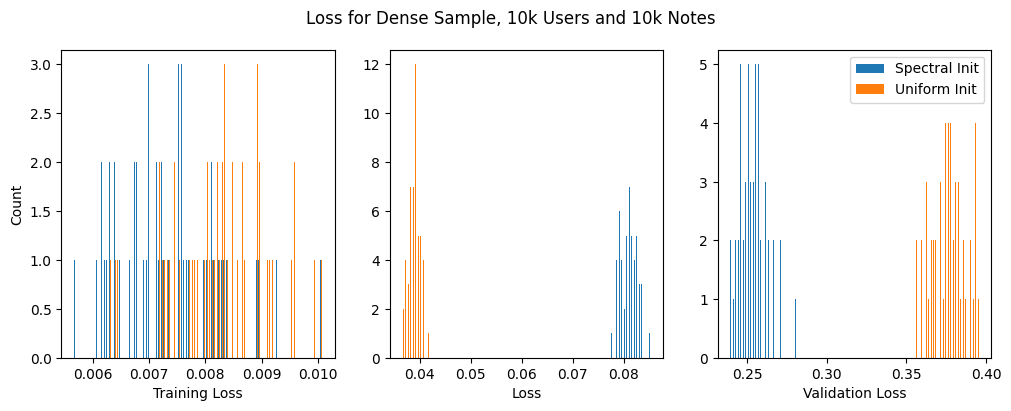

In [14]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist([all_spec_train_loss_dense, all_unif_train_loss_dense], bins=100)
ax[0].set_xlabel("Training Loss")
ax[0].set_ylabel("Count")

ax[1].hist([all_spec_loss_dense, all_unif_loss_dense], bins=100)
ax[1].set_xlabel("Loss")

ax[2].hist([all_spec_validate_loss_dense, all_unif_validate_loss_dense], bins=100, label=["Spectral Init", "Uniform Init"])
ax[2].set_xlabel("Validation Loss")
ax[2].legend()

fig.suptitle("Loss for Dense Sample, 10k Users and 10k Notes")
fig.show()

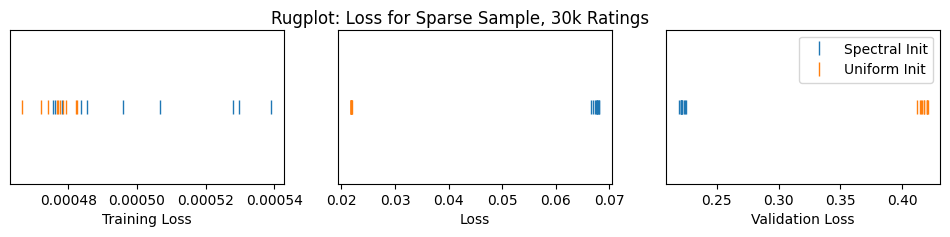

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))

for data in [all_spec_train_loss_30k, all_unif_train_loss_30k]:
    ax[0].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[0].set_xlabel("Training Loss")
ax[0].yaxis.set_visible(False)

for data in [all_spec_loss_30k, all_unif_loss_30k]:
    ax[1].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[1].set_xlabel("Loss")
ax[1].yaxis.set_visible(False)

for data, label in zip([all_spec_validate_loss_30k, all_unif_validate_loss_30k], ["Spectral Init", "Uniform Init"]):
    ax[2].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10, label=label)
ax[2].set_xlabel("Validation Loss")
ax[2].legend()
ax[2].yaxis.set_visible(False)

fig.suptitle("Rugplot: Loss for Sparse Sample, 30k Ratings")
plt.show()

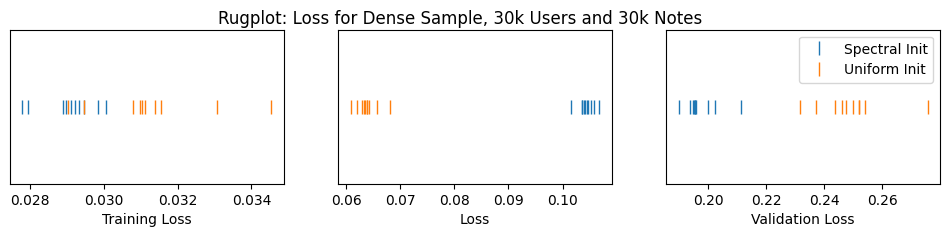

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))

for data in [all_spec_train_loss_30k_dense, all_unif_train_loss_30k_dense]:
    ax[0].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[0].set_xlabel("Training Loss")
ax[0].yaxis.set_visible(False)

for data in [all_spec_loss_30k_dense, all_unif_loss_30k_dense]:
    ax[1].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[1].set_xlabel("Loss")
ax[1].yaxis.set_visible(False)

for data, label in zip([all_spec_validate_loss_30k_dense, all_unif_validate_loss_30k_dense], ["Spectral Init", "Uniform Init"]):
    ax[2].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10, label=label)
ax[2].set_xlabel("Validation Loss")
ax[2].legend()
ax[2].yaxis.set_visible(False)

fig.suptitle("Rugplot: Loss for Dense Sample, 30k Users and 30k Notes")
plt.show()

C:\Users\iijof\AppData\Local\Temp\ipykernel_19676\1107904351.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


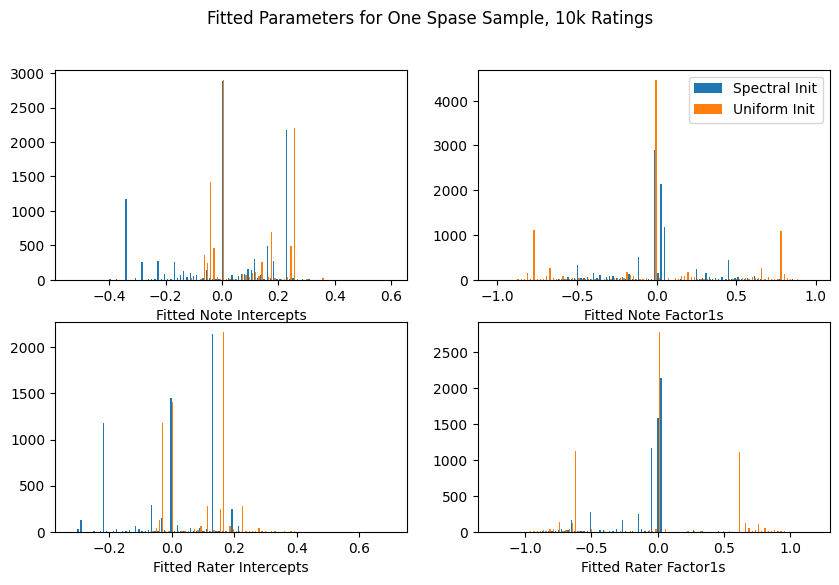

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

ax[0][0].hist([all_spec_fitNoteParams[0]["internalNoteIntercept"], all_unif_fitNoteParams[0]["internalNoteIntercept"]], bins=100)
ax[0][0].set_xlabel("Fitted Note Intercepts")

ax[0][1].hist([all_spec_fitNoteParams[0]["internalNoteFactor1"], all_unif_fitNoteParams[0]["internalNoteFactor1"]], bins=100, label=["Spectral Init", "Uniform Init"])
ax[0][1].set_xlabel("Fitted Note Factor1s")
ax[0][1].legend()

ax[1][0].hist([all_spec_fitRaterParams[0]["internalRaterIntercept"], all_unif_fitRaterParams[0]["internalRaterIntercept"]], bins=100)
ax[1][0].set_xlabel("Fitted Rater Intercepts")

ax[1][1].hist([all_spec_fitRaterParams[0]["internalRaterFactor1"], all_unif_fitRaterParams[0]["internalRaterFactor1"]], bins=100)
ax[1][1].set_xlabel("Fitted Rater Factor1s")

fig.suptitle("Fitted Parameters for One Spase Sample, 10k Ratings")
fig.show()

C:\Users\iijof\AppData\Local\Temp\ipykernel_19676\1387034380.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


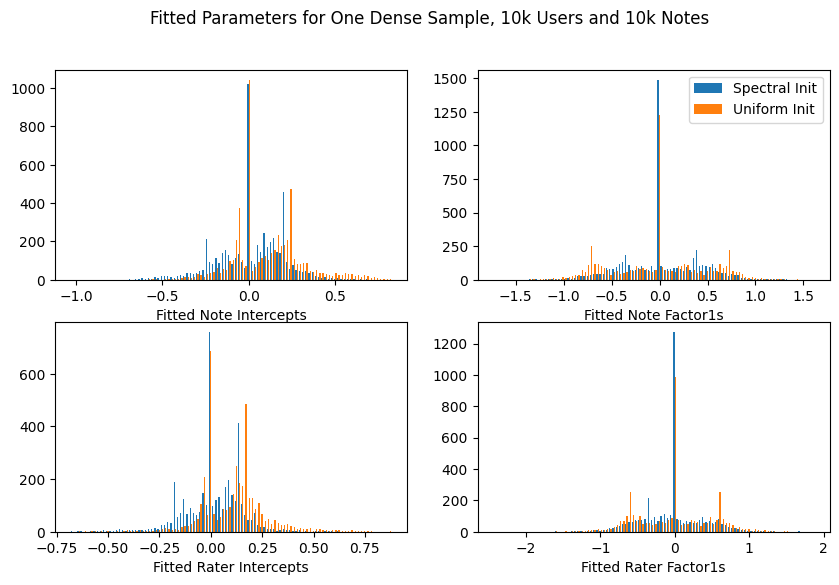

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

ax[0][0].hist([all_spec_fitNoteParams_dense[0]["internalNoteIntercept"], all_unif_fitNoteParams_dense[0]["internalNoteIntercept"]], bins=100)
ax[0][0].set_xlabel("Fitted Note Intercepts")

ax[0][1].hist([all_spec_fitNoteParams_dense[0]["internalNoteFactor1"], all_unif_fitNoteParams_dense[0]["internalNoteFactor1"]], bins=100, label=["Spectral Init", "Uniform Init"])
ax[0][1].set_xlabel("Fitted Note Factor1s")
ax[0][1].legend()

ax[1][0].hist([all_spec_fitRaterParams_dense[0]["internalRaterIntercept"], all_unif_fitRaterParams_dense[0]["internalRaterIntercept"]], bins=100)
ax[1][0].set_xlabel("Fitted Rater Intercepts")

ax[1][1].hist([all_spec_fitRaterParams_dense[0]["internalRaterFactor1"], all_unif_fitRaterParams_dense[0]["internalRaterFactor1"]], bins=100)
ax[1][1].set_xlabel("Fitted Rater Factor1s")

fig.suptitle("Fitted Parameters for One Dense Sample, 10k Users and 10k Notes")
fig.show()

Additionally, in all settings, the spectral initialization always gives a global intercept near $0.6$, very close the the mean rating, which is what I set empty cells in the to-be-decomposed matrix to. The uniform initialization, on the other hand, almost always gives a global intercept near $0.08$. Since that code initializes the global intercept to 0, I don't know where this comes from. 

## Iterative Spectral Initialization

I also had the the idea to run several iterations of optimization using the SVD. In the first, nan values in the data are filled with user and note means, as above, but in subsequent rounds of optimization, the spectral initialization's SVD uses the data matrix where the nans are filled with the sum of the note and user's intercept, as learned in the previous round. Ultimately, I found that this had little impact. For the sparse samples, the parameters had almost no movement past the first round. For the dense samples, some did move around, but not in an obviously convergent way (at least in one dimension, I didn't check past that) and it did not lead to improvement in loss. This is still interesting though because it suggests that the low-loss optima found using spectral initialization aren't extremely unique and special. 

I left the code in since maybe it could be made to work with some further tweaks. One such idea that I haven't yet tested would be to add noise to the data within each round, and then take some kind of average of the parameters that each round finds. 